In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import sqlite3 as sql
import os
import pandas as pd
from datetime import datetime
from glob import glob
import sklearn as sk
import sklearn.linear_model

os.sys.path.append('../')
import PlaceCellAnalysis as pc
import utilities as u
import preprocessing as pp
import behavior as b
import BayesianDecoding as bd


%load_ext autoreload
%autoreload 2

%matplotlib inline

In [3]:
mice = ['4139190.1','4139190.3','4139212.2','4139212.4','4139219.2','4139219.3','4139224.2','4139224.3','4139224.5']

In [59]:
df = pp.load_session_db()
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])


In [63]:
mouse = '4139219.3'
df_mouse = df[df['MouseName'].str.match(mouse)]
df_mouse = df_mouse[ df_mouse['Track'].str.match('TwoTower_Timeout')]
sess = df_mouse.iloc[8]
# VRDat,C,Cd, S, A = pp.load_scan_sess(sess)
# trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
# nm = np.unique(trial_info['morphs']).shape[0]

In [64]:
df_mouse

,MouseName,DateFolder,SessionNumber,Track,RewardCount,Imaging,ImagingRegion,DateTime,data file,scanfile,scanmat
708,4139219.3,12_10_2018,2,TwoTower_Timeout,54,1,CA1,2018-10-12,G:\My Drive\\VR_Data\TwoTower\4139219.3\12_10_...,G:\My Drive\2P_Data\TwoTower\4139219.3\12_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.3\12_10_2...
754,4139219.3,15_10_2018,2,TwoTower_Timeout,46,1,CA1,2018-10-15,G:\My Drive\\VR_Data\TwoTower\4139219.3\15_10_...,G:\My Drive\2P_Data\TwoTower\4139219.3\15_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.3\15_10_2...
801,4139219.3,17_10_2018,2,TwoTower_Timeout,38,1,CA1,2018-10-17,G:\My Drive\\VR_Data\TwoTower\4139219.3\17_10_...,G:\My Drive\2P_Data\TwoTower\4139219.3\17_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.3\17_10_2...
841,4139219.3,19_10_2018,2,TwoTower_Timeout,51,1,CA1,2018-10-19,G:\My Drive\\VR_Data\TwoTower\4139219.3\19_10_...,G:\My Drive\2P_Data\TwoTower\4139219.3\19_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.3\19_10_2...
856,4139219.3,20_10_2018,1,TwoTower_Timeout,51,1,CA1,2018-10-20,G:\My Drive\\VR_Data\TwoTower\4139219.3\20_10_...,G:\My Drive\2P_Data\TwoTower\4139219.3\20_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.3\20_10_2...
857,4139219.3,20_10_2018,2,TwoTower_Timeout,53,1,CA1,2018-10-20,G:\My Drive\\VR_Data\TwoTower\4139219.3\20_10_...,G:\My Drive\2P_Data\TwoTower\4139219.3\20_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.3\20_10_2...
874,4139219.3,22_10_2018,1,TwoTower_Timeout,49,1,CA1,2018-10-22,G:\My Drive\\VR_Data\TwoTower\4139219.3\22_10_...,G:\My Drive\2P_Data\TwoTower\4139219.3\22_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.3\22_10_2...
893,4139219.3,23_10_2018,1,TwoTower_Timeout,102,1,CA1,2018-10-23,G:\My Drive\\VR_Data\TwoTower\4139219.3\23_10_...,G:\My Drive\2P_Data\TwoTower\4139219.3\23_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.3\23_10_2...
920,4139219.3,25_10_2018,1,TwoTower_Timeout,85,1,CA1,2018-10-25,G:\My Drive\\VR_Data\TwoTower\4139219.3\25_10_...,G:\My Drive\2P_Data\TwoTower\4139219.3\25_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.3\25_10_2...
921,4139219.3,25_10_2018,2,TwoTower_Timeout,32,1,DG,2018-10-25,G:\My Drive\\VR_Data\TwoTower\4139219.3\25_10_...,G:\My Drive\2P_Data\TwoTower\4139219.3\25_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.3\25_10_2...


In [ ]:

for i in range(df_mouse.shape[0]):
    sess = df_mouse.iloc[8]
    VRDat,C,Cd, S, A = pp.load_scan_sess(sess)
    trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
    nm = np.unique(trial_info['morphs']).shape[0]
    if nm>2:
        
        

In [50]:
# load file
path = os.path.join("G:\\My Drive\\EngramCoding\\KW\\S\\all","%s_%s_%d" % (mouse,sess.DateFolder,sess.SessionNumber))
H = np.load(os.path.join(path,"H.npy"))
P = np.load(os.path.join(path,"P.npy"))
Y = np.load(os.path.join(path,"Yspl.npy"))

In [54]:
print(H.shape)

(644,)


In [51]:
# FDR 
sort = np.argsort(P)
P,B = P[sort], H[sort]
Y = Y[sort,:]
k = 0
while P[k]<= (k+1)/Y.shape[0]*.05:
    k+=1
print(k)

51


1.0


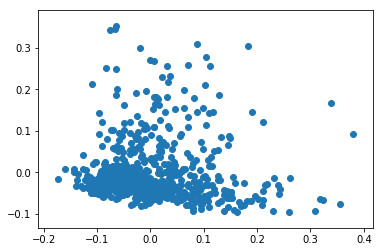

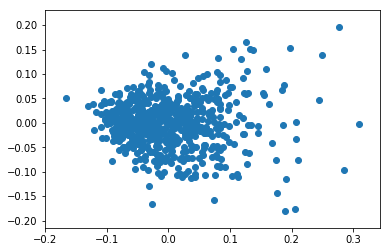

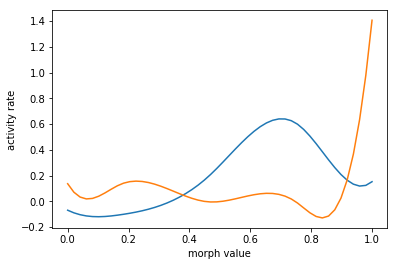

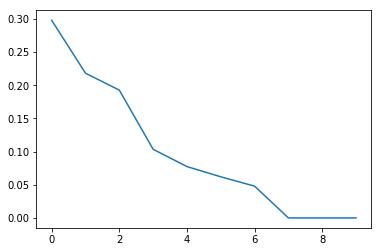

In [53]:
from sklearn import decomposition
pca = sk.decomposition.PCA()
Y_pca = pca.fit_transform(Y[:,:])
f,ax = plt.subplots()
ax.scatter(Y_pca[:,0],Y_pca[:,1])
f,ax = plt.subplots()
ax.scatter(Y_pca[:,2],Y_pca[:,3])
f,ax = plt.subplots()
xx = np.linspace(0,1)
ax.plot(xx,pca.singular_values_[0]*pca.components_[0,:] +pca.mean_)
ax.plot(xx,pca.singular_values_[1]*pca.components_[1,:]+pca.mean_)
# ax.plot(xx,pca.singular_values_[2]*pca.components_[2,:]+pca.mean_)
# ax.plot(xx,pca.components_[3,:]+pca.mean_)
# ax.plot(xx,pca.components_[4,:]+pca.mean_)
# ax.plot(pca.components_[5,:]+pca.mean_)
ax.set_xlabel('morph value')
ax.set_ylabel('activity rate')


f,ax = plt.subplots()
ax.plot(pca.explained_variance_ratio_[:10])
print(pca.explained_variance_ratio_.sum())


In [ ]:
for mouse in mice[0]:
    df_mouse = df[df['MouseName'].str.match(mouse)]
    df_mouse = df_mouse[df_mouse['Track'].str.match('TwoTower_noTimeout') | df_mouse['Track'].str.match('TwoTower_Timeout')]
    
    for i in range(1) : #df_mouse.shape[0]):

        sess = df_mouse.iloc[i]
        VRDat,C,Cd, S, A = pp.load_scan_sess(sess)
        trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
        nm = np.unique(trial_info['morphs']).shape[0]
        
        